In [1]:
import torch

from helper import linear_q_with_scale_and_zero_point, linear_dequantization, plot_quantization_errors

### a dummy tensor to test the implementation
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

# 计算scale 与 zero point

In [2]:
q_min = torch.iinfo(torch.int8).min
q_max = torch.iinfo(torch.int8).max

In [3]:
# r_min = test_tensor.min()
r_min = test_tensor.min().item()

In [4]:
r_max = test_tensor.max().item()

In [5]:
scale = (r_max - r_min) / (q_max - q_min)

In [6]:
zero_point = q_min - (r_min / scale)

In [7]:
zero_point = int(round(zero_point))

$$
s = (r_{max} - r_{min})/ (q_{max} - q_{min})\\
z = int(round(q_{min} - r_{min}/s))
$$

In [8]:
def get_q_scale_and_zero_point(tensor, dtype=torch.int8):
    
    q_min, q_max = torch.iinfo(dtype).min, torch.iinfo(dtype).max
    r_min, r_max = tensor.min().item(), tensor.max().item()

    scale = (r_max - r_min) / (q_max - q_min)

    zero_point = q_min - (r_min / scale)

    # clip the zero_point to fall in [quantized_min, quantized_max]
    if zero_point < q_min:
        zero_point = q_min
    elif zero_point > q_max:
        zero_point = q_max
    else:
        # round and cast to int
        zero_point = int(round(zero_point))
    
    return scale, zero_point

In [9]:
new_scale, new_zero_point = get_q_scale_and_zero_point(
    test_tensor)

In [10]:
new_scale

3.578823433670343

In [12]:
new_zero_point

-77

In [11]:

new_zero_point

-77

# 用计算的scale与point量化

In [ ]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, new_scale, new_zero_point)

In [16]:
dequantized_tensor = linear_dequantization(quantized_tensor,
                                           new_scale, new_zero_point)

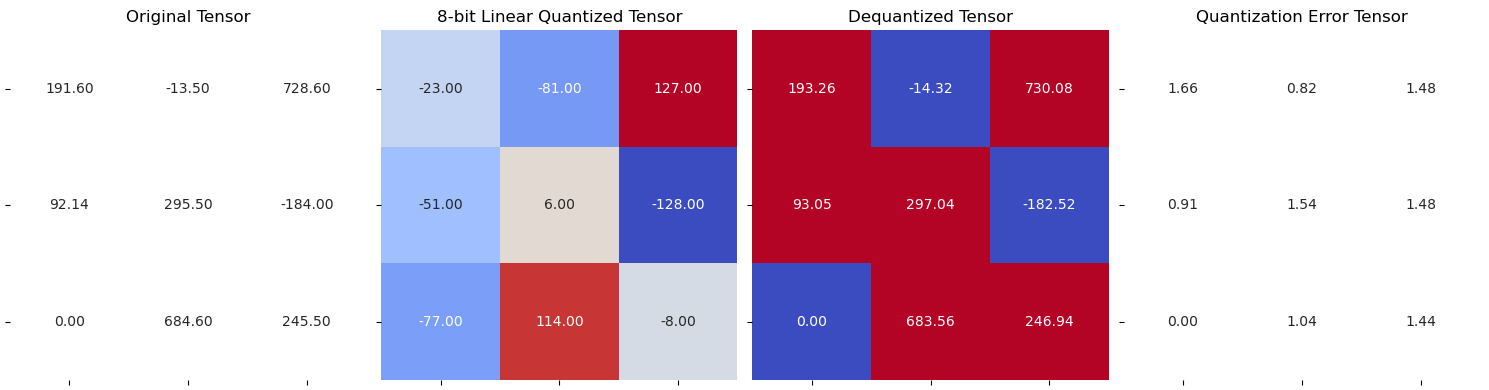

In [17]:
plot_quantization_errors(test_tensor, quantized_tensor, 
                         dequantized_tensor)

In [18]:
(dequantized_tensor-test_tensor).square().mean()

tensor(1.5730)

# 把二者放在一起

In [19]:
def linear_quantization(tensor, dtype=torch.int8):
    scale, zero_point = get_q_scale_and_zero_point(tensor, 
                                                   dtype=dtype)
    
    quantized_tensor = linear_q_with_scale_and_zero_point(tensor,
                                                          scale, 
                                                          zero_point, 
                                                          dtype=dtype)
    
    return quantized_tensor, scale , zero_point

In [20]:
r_tensor = torch.randn((4, 4))

In [21]:
quantized_tensor, scale, zero_point = linear_quantization(r_tensor)

In [22]:
quantized_tensor

tensor([[  11,    5,  -20, -123],
        [-123,  -63, -128,    9],
        [ 127,  -29,   27,   -5],
        [   6,  -29,   73,   12]], dtype=torch.int8)

In [23]:
dequantized_tensor = linear_dequantization(quantized_tensor,
                                           scale, zero_point)

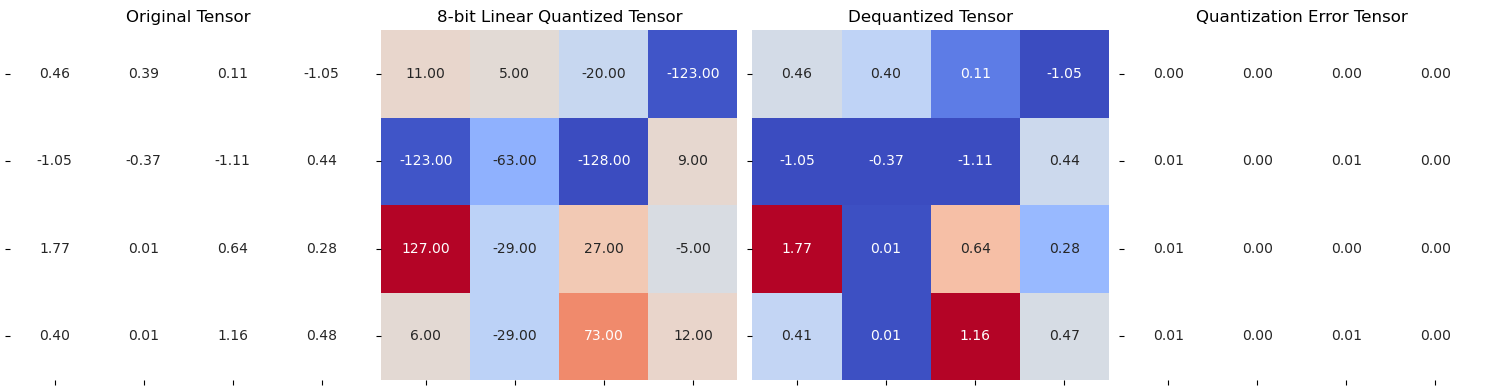

In [24]:
plot_quantization_errors(r_tensor, quantized_tensor,
                         dequantized_tensor)

In [25]:
(dequantized_tensor-r_tensor).square().mean()

tensor(1.1262e-05)